# Tensorflow

Como se indica en su [web oficial](https://www.tensorflow.org):

> TensorFlow es una plataforma de código abierto de extremo a extremo para el aprendizaje automático. Cuenta con un ecosistema integral y flexible de herramientas, bibliotecas y recursos de la comunidad que les permite a los investigadores innovar con el aprendizaje automático y, a los desarrolladores, compilar e implementar con facilidad aplicaciones con tecnología de Aprendizaje Automático.

Dicho de otra forma, es una biblioteca de código abierto de aprendizaje automático/aprendizaje profundo desarrollada por el equipo de Google Brain que permite, entre otras cosas, la ejecución de código en Python, Java, R, ... de manera paralela en múltiples CPUs y GPUs.

## El elemento básico: el tensor

Un [**tensor**](https://es.wikipedia.org/wiki/C%C3%A1lculo_tensorial) es cierta clase de entidad algebraica de varios componentes que generaliza los conceptos de escalar, vector y matriz de una manera que sea independiente de cualquier sistema de coordenadas elegido.

Una vez elegida una base vectorial, los componentes de un tensor en una base vendrán dadas por una multimatriz. El orden de un tensor será el número de índices necesario para especificar sin ambigüedad un componente de un tensor: un escalar será considerado como un tensor de orden 0; un vector, un tensor de orden 1; y dada una base vectorial, los tensores de segundo orden pueden ser representados por una matriz.

![Tensor de Levi-Civita](https://upload.wikimedia.org/wikipedia/commons/7/71/Epsilontensor.svg)

Los cómputos de **Tensorflow** son grafos de flujo de datos en los cuales los nodos representan tensores y las aristas representan relaciones entre dichos nodos. Por ejemplo, el resultado de la suma de dos tensores es, a su vez, otro tensor:

In [1]:
import tensorflow as tf

tensor1 = tf.constant(27)
tensor2 = tf.constant(40)
tf.add(tensor1, tensor2)

<tf.Tensor: shape=(), dtype=int32, numpy=67>

Otro ejemplo: la multiplicación de dos tensores de orden 2:

In [3]:
t1 = tf.constant([
    [7, 4],
    [2, 2]
])

t2 = tf.constant([
    [3],
    [5]
])
tf.matmul(t1, t2)

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[41],
       [16]], dtype=int32)>

Además de especificar su valor de manera explícita, **Tensorflow** nos ofrece inicializadores parametrizables para crear tensores con características predefinidas:

In [4]:
tfill = tf.fill((2, 2, 2), 1.1) # Tensor de orden 3 relleno completamente con el valor 1.1
print(tfill)

tzeros = tf.zeros((4,)) # Tensor de orden 1 con 4 ceros
print(tzeros)

tones = tf.ones((2, 2)) # Tensor de orden 2 con unos
print(tones)

tf.Tensor(
[[[1.1 1.1]
  [1.1 1.1]]

 [[1.1 1.1]
  [1.1 1.1]]], shape=(2, 2, 2), dtype=float32)
tf.Tensor([0. 0. 0. 0.], shape=(4,), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [5]:
# with tf.device('/GPU:1'):

Los **tensores** se llevan bien con *NumPy*: puedes crear un tensor a partir de un array de NumPy, y viceversa. Incluso puedes aplicar operaciones de TensorFlow a matrices de NumPy y operaciones de NumPy a tensores:

In [11]:
import numpy as np

a = np.array([2., 4., 5.])
print(tf.constant(a, dtype=tf.float32))

tf.square(a)

tf.Tensor([2. 4. 5.], shape=(3,), dtype=float32)


<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

Como se puede obsevar, cuando hemos contruido un tensor a partir de un array de *NumPy* hemos especificado el tipo de datos `tf.float32`. Esto se debe a que *NumPy* utiliza un tamaño de 64 bits para los valores en coma flotante, mientras que **Tensorflow** usa 32 bits para el mismo tipo de datos.

Hay que prestar especial cuidado a que los tipos de los tensores coincidan cuando se opera con ellos, ya que en caso contrario la librería nos devuelve un error. Siempre podemos transformar de un tipo a otro utilizando `dtype=<type>` o bien `tf.cast()`:

In [13]:
# Si descomentas la siguiente línea, obtienes un error:
# tf.constant(4.7) + tf.constant(20)
t20 = tf.constant(20)
tf.constant(4.7) + tf.cast(t20, dtype=tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=24.7>

## Variables

Hasta ahora, todos los tensores con los que hemos trabajado eran inmutables, es decir, su valor no se puede cambiar una vez han sido inicializados.

En **Tensorflow**, el concepto de variable es distinto al usual, ya que nos encontramos ante una librería de *Machine Learning*. Una variable es un parámetro del modelo que queremos aprender o, dicho de otra forma, un *peso* que forma parte de una función de coste a ajustar mediante un algoritmo de optimización. Es altamente improbable que tengamos que modificar el valor de una variable por nuestra cuenta, ya que eso es tarea del algoritmo de optimización.

Podemos declarar variables **Tensorflow** que alberguen tensores de la siguiente forma:

In [22]:
v1 = tf.Variable(initial_value=tf.random.uniform((4,4),0,1))
v2 = tf.Variable(initial_value=11.2)

Podemos realizar operaciones de lectura y escritura de variables:

- `.read_value()` para leer el valor de una variable
- `.assign()`, `.assign_add()` y `.assign_sub()` para escribir y/o actualizar el valor de una variable

In [23]:
v1.read_value()

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.42368412, 0.13072741, 0.05083394, 0.27491677],
       [0.430884  , 0.33739102, 0.19206774, 0.9098592 ],
       [0.38008714, 0.5228889 , 0.43160272, 0.16131401],
       [0.75684774, 0.8613702 , 0.49176025, 0.07519436]], dtype=float32)>

In [24]:
v2.assign_add(0.9)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=12.099999>

El constructor de variables de **Tensorflow** tiene un parámetro booleano `trainable` para diferenciar aquellas variables que tienen que ser ajustadas (aprendidas, entrenadas, ...) para definir el modelo o variables genéricas necesarias para el funcionamiento del mismo, como por ejemplo el número de iteraciones.

## Placeholders

Ya tenemos la herramienta para declarar parámetros del modelo de aprendizaje, pero todavía no tenemos cómo especificar las cracterísticas o *features* mediante las cuales el modelo extraerá el conocimiento.

En **Tensorflow** las *features* se declaran como **placeholders** y, al igual que sucede con las variables, tienen su propio constructor:

In [25]:
# Necesario para compatibilizar TF1 con TF2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X = tf.placeholder(tf.float32, shape=(None,3))       # "None" significa que el número de filas aún no está definido. 
b = tf.placeholder(tf.float32, shape=(3,1))

Instructions for updating:
non-resource variables are not supported in the long term


Los **placeholders** son una característica de la **v1** de **Tensorflow**, por lo que tenemos que re-importar la librería en el modo compatibilidad, así como desactivar las características de la **v2**. Entre otras cosas, se deshabilita la ejecución *eager* de los grafos, por lo que será necesario abrir sesiones a partir de ahora.

Podemos observar que se nos permite un número arbitrario de filas para las variables de este tipo, poniendo a `None` el parámetro correspondiente a su dimensión.

Los valores no se asignarán a los **placeholders** hasta el momento en que se ejecute el grafo de tensores:

In [26]:
X1 = np.random.uniform(0.0, 1.0, (3,3))
X2 = np.random.normal(0.0, 1.0, (10,3))
b0 = np.array([1,2,3]).reshape((-1,1))

y = tf.matmul(X, b)
with tf.Session() as sess:
    print(sess.run(y, feed_dict={X:X1, b:b0}))       # Alimenta los datos.
    print("\n")
    print(sess.run(y, feed_dict={X:X2, b:b0}))       # Alimenta los datos.

[[2.3203425]
 [2.8659291]
 [2.0325646]]


[[-3.0157547]
 [-3.098227 ]
 [ 5.6696734]
 [ 4.9473605]
 [-2.126623 ]
 [-3.475409 ]
 [-3.875013 ]
 [ 4.582823 ]
 [ 1.2528943]
 [-5.8383956]]


## Caso de estudio: regresión lineal

los modelos de regresión se suelen generalizar del siguiente modo:

$$
Y = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + \cdots + \beta_m \cdot X_m + \epsilon
$$

Donde:

- $\beta_0$ se corresponde con el *bias* de la recta.
- $\beta_1, \dots, \beta_m$ son los parámetros de la pendiente de la recta en las diferentes dimensiones
- $\epsilon$ representa el error que cometemos al no poder aproximar perfectamente todos los puntos. Nótese que cuando tenemos más de 2 puntos es prácticamente imposible encontrar una **recta** que pase por todos ellos.

Podemos escribir la expresión anterior usando una notación más compacta de matrices:

$$
Y = X \cdot \beta + \epsilon
$$

Para comprobar el funcionamiento de la regresión lineal en **Tensorflow** vamos a utilizar el conjunto de datos de [*boston house-prices*](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset) que contiene 13 variables (*features*) relacionadas con las viviendas de una determinada barriada de la ciudad de Boston, y una variable objetivo que es el valor mediano de las viviendas de ese barrio en miles de dólares:

In [37]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
X = boston.data
y = boston.target

(506, 13)

Hacemos un preprocesamiento rápido del *dataset* ya que la regresión lineal es muy sensible a las diferencias en las escalas de los valores de las variables:

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X.shape

(506, 13)

Ahora que sabemos la dimensionalidad de nuestro problema, podemos definir los **placeholder** para las entradas:

In [150]:
Xi = tf.placeholder(tf.float32, shape=(None, X.shape[1]))
Yi = tf.placeholder(tf.float32, shape=(None, 1))

De la misma forma podemos definir los parámetros de nuestro modelo como **variables** de Tensorflow:

In [151]:
beta = tf.Variable(initial_value=tf.random_normal(shape=(X.shape[1], 1)))
beta0 = tf.Variable(tf.zeros([1]))

Una vez tenemos las variables creadas, podemos definir nuestro modelo de regresión lineal como un grafo de operaciones sobre estas variables:

In [152]:
yhat = tf.add(tf.matmul(Xi, beta), beta0)

El ajuste de cualquier modelo de *machine learning* se lleva a cabo mediante la optimización de una función de coste que represente cuánto se está equivocando el modelo en cuestión. Vamos a definir la función de coste como el **error cuadrático o L2**:

In [153]:
loss = tf.reduce_sum(tf.square(Yi - yhat))

Por último tenemos que elegir el método de optimización de la función de coste, en nuestro caso el algoritmo de **descenso de gradiente** canónico que está implementado en **Tensorflow**, además de definir el método de entrenamiento (minimizar la función de coste) y la inicialización de las variables (parámetros del problema):

In [182]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0005)
train = optimizer.minimize(loss)
init = [tf.global_variables_initializer(), tf.local_variables_initializer()]

Ya tenemos todos los elementos definidos, por lo que basta con ejecutar el grafo que representa todos los pasos del algoritmo de optimización elegido. Para validar el modelo utilizaremos las métricas de calidad de regresión: MSE, MAE y RMSE:

yhat = (404, 1)
y_true = (404, 1)
cost = 10556.681640625
W = [[ -3.274589 ]
 [  3.02091  ]
 [ -2.0710044]
 [  3.7703202]
 [ -0.6509441]
 [ 21.024826 ]
 [  1.7905577]
 [ -2.0817237]
 [  1.6206309]
 [ -1.8542298]
 [ -6.239719 ]
 [  7.3429246]
 [-13.30216  ]]
b = [12.822431]
Validación: MSE=2825.68 MAE=350.70 RMSE=350.70


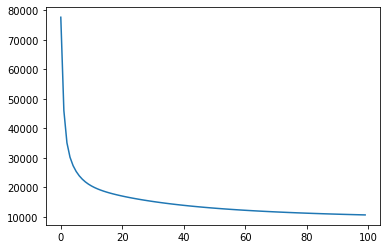

In [192]:
with tf.Session() as session:
    errors = []
    session.run(init)

    for _ in range(100):

        session.run(train, feed_dict={
            Xi: X_train,
            Yi: Y_train.reshape(Y_train.shape[0], 1)
        })
        
        errors.append(session.run(loss, feed_dict={
            Xi: X_train,
            Yi: Y_train.reshape(Y_train.shape[0], 1)
        }))
    print("yhat = {}".format(session.run(yhat, feed_dict={
        Xi: X_train,
        Yi: Y_train.reshape(Y_train.shape[0], 1)
    }).shape))
    print("y_true = {}".format(Y_train.reshape(Y_train.shape[0], 1).shape))
    print("cost = {}".format(session.run(loss, feed_dict={
        Xi: X_train,
        Yi: Y_train.reshape(Y_train.shape[0], 1)
    })))

    print("W = {}".format(session.run(beta)))
    print("b = {}".format(session.run(beta0)))
    
    # Validación del modelo
    # MSE
    mse = tf.reduce_sum(tf.square(Yi - yhat))
    mae = tf.reduce_sum(tf.abs(Yi - yhat))
    rmse = tf.reduce_sum(tf.sqrt(tf.square(Yi - yhat)))
    
    mse_value = session.run(mse, feed_dict={Xi:X_test, Yi:Y_test.reshape(Y_test.shape[0], 1)})
    mae_value = session.run(mae, feed_dict={Xi:X_test, Yi:Y_test.reshape(Y_test.shape[0], 1)})
    rmse_value = session.run(rmse, feed_dict={Xi:X_test, Yi:Y_test.reshape(Y_test.shape[0], 1)})
    
    print(f"\nValidación: MSE={mse_value:5.2f} MAE={mae_value:5.2f} RMSE={rmse_value:5.2f}")

import matplotlib.pyplot as plt

plt.plot(errors)

Una vez que tenemos definida la **regresión lineal** podríamos añadirle regularización para convertirla en **Ridge**, **Lasso** y **ElasticNet**. Para ello vamos a encapsular el proceso de entrenamiento y validación en una función para que sea más cómodo ejecutarlo. Empezamos por **regresión Ridge**, la cual modifica la función de perdida del modelo para plantear el siguiente problema de optimización:

$$
\min_{\beta} (\beta \cdot X - Y)^2 + \alpha \cdot ||\beta||_2^2
$$

In [197]:
def train_and_validate_ridge(
    data,
    target,
    alpha=0.1,
    learning_rate=0.0005,
    n_iters=100,
    test_size=0.2,
    random_state=None,
):
    # Train-test split
    data_train, data_test, target_train, target_test = train_test_split(
        data, target, test_size=test_size, random_state=random_state
    )

    with tf.Session() as session, tf.compat.v1.variable_scope("ridge"):
        # Placeholders:
        X = tf.placeholder(tf.float32, shape=(None, data_train.shape[1]))
        Y = tf.placeholder(tf.float32, shape=(None, 1))

        # Parámetros del modelo:
        beta = tf.Variable(initial_value=tf.random_normal(shape=(data_train.shape[1], 1)))
        beta0 = tf.Variable(tf.zeros([1]))
        
        # Modelo
        yhat = tf.add(tf.matmul(X, beta), beta0)
        
        # Función de coste adaptada para regularización Ridge
        loss = tf.reduce_sum(tf.square(Y - yhat) + (alpha * tf.square(tf.norm(beta))))
        
        # Entrenamiento e inicialización
        train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
        init = [tf.global_variables_initializer(), tf.local_variables_initializer()]
        
        errors = []
        session.run(init)

        for _ in range(n_iters):

            session.run(
                train, feed_dict={X: data_train, Y: target_train.reshape(target_train.shape[0], 1)}
            )

            errors.append(
                session.run(
                    loss,
                    feed_dict={X: data_train, Y: target_train.reshape(target_train.shape[0], 1)},
                )
            )
        print(
            "cost = {}".format(
                session.run(
                    loss,
                    feed_dict={X: data_train, Y: target_train.reshape(target_train.shape[0], 1)},
                )
            )
        )

        print("W = {}".format(session.run(beta)))
        print("b = {}".format(session.run(beta0)))

        # Validación del modelo
        # MSE
        mse = tf.reduce_sum(tf.square(Y - yhat))
        mae = tf.reduce_sum(tf.abs(Y - yhat))
        rmse = tf.reduce_sum(tf.sqrt(tf.square(Y - yhat)))

        mse_value = session.run(
            mse, feed_dict={X: data_test, Y: target_test.reshape(target_test.shape[0], 1)}
        )
        mae_value = session.run(
            mae, feed_dict={X: data_test, Y: target_test.reshape(target_test.shape[0], 1)}
        )
        rmse_value = session.run(
            rmse, feed_dict={X: data_test, Y: target_test.reshape(target_test.shape[0], 1)}
        )

        print(
            f"\nValidación: MSE={mse_value:5.2f} MAE={mae_value:5.2f} RMSE={rmse_value:5.2f}"
        )

    import matplotlib.pyplot as plt

    plt.plot(errors)


cost = 27603.6640625
W = [[-0.4121435 ]
 [ 0.7931541 ]
 [-1.2045095 ]
 [ 0.6189763 ]
 [-0.9469664 ]
 [ 1.404561  ]
 [-0.9134362 ]
 [ 0.22289616]
 [-1.0602585 ]
 [-1.3500694 ]
 [-1.4503169 ]
 [ 1.0352085 ]
 [-1.9310377 ]]
b = [24.428661]

Validación: MSE=7135.11 MAE=599.87 RMSE=599.87


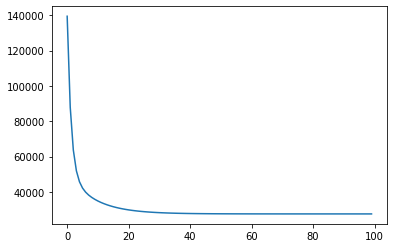

In [200]:
train_and_validate_ridge(X, y, alpha=0.5)

En el caso de la **regresión Lasso** y **ElasticNet**, tenemos que seguir el mismo enfoque y modificar únicamente la función de pérdida, tarea que se deja al lector.

## Caso de estudio: regresión logística
Pasamos ahora a modelos de clasificación y, concretamente, la **regresión logística**. Recordamos que este modelo transforma la **regresión lineal** en una interpretación probabilística de que una muestra pertenezca a una clase dada mediante la aplicación de la función *sigmoide*:

$$
logit(x) = \frac{1}{1+ e^{-x}}
$$

Por lo tanto, el modelo será muy parecido al que ya tenemos de **regresión lineal**, aunque ajustando la salida del modelo y la función de coste, que en este caso será la **entropía cruzada**. Al igual que antes, vamos a encapsular el entrenamiento y validación del modelo en una función. Para calcular las predicciones usaremos `argmax` y así elegir la clase con una probabilidad de pertenencia más alta:

In [215]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

def logistic_regression(
    data,
    target,
    learning_rate=0.0005,
    n_iters=100,
    test_size=0.2,
    random_state=None,
):
    # Train-test split
    data_train, data_test, target_train, target_test = train_test_split(
        data, target, test_size=test_size, random_state=random_state
    )

    with tf.Session() as session, tf.compat.v1.variable_scope("logistic"):
        # Placeholders:
        X = tf.placeholder(tf.float32, shape=(None, data_train.shape[1]))
        Y = tf.placeholder(tf.float32, shape=(None, target_train.shape[1]))

        # Parámetros del modelo:
        W = tf.Variable(initial_value=tf.random_normal(shape=(data_train.shape[1], 1)))
        b = tf.Variable(tf.zeros([target_train.shape[1]]))
        
        # Modelo
        model = tf.add(tf.matmul(X, W), b)
        
        # Función de coste: entropía cruzada
        loss  = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=target_train, logits=model))
        
        # Entrenamiento e inicialización
        train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
        init = [tf.global_variables_initializer(), tf.local_variables_initializer()]
        
        errors = []
        session.run(init)

        for _ in range(n_iters):

            session.run(
                train, feed_dict={X: data_train, Y: target_train}
            )

            errors.append(
                session.run(
                    loss,
                    feed_dict={X: data_train, Y: target_train},
                )
            )
        print(
            "cost = {}".format(
                session.run(
                    loss,
                    feed_dict={X: data_train, Y: target_train},
                )
            )
        )

        print("W = {}".format(session.run(W)))
        print("b = {}".format(session.run(b)))
        
        correct_predictions = tf.equal(tf.argmax(Y, axis=1), tf.argmax(model, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
        accuracy_value = session.run(accuracy, feed_dict={X:data_test, Y:target_test})
        y_true = session.run(tf.argmax(Y, axis=1), feed_dict={X:data_test, Y:target_test})
        y_pred = session.run(tf.argmax(model, axis=1), feed_dict={X:data_test, Y:target_test})
        precision_value = precision_score(y_true, y_pred, average='weighted')
        recall_value = recall_score(y_true, y_pred, average='weighted')
        f1_value = f1_score(y_true, y_pred, average='weighted')
        
        print(
            f"\nValidación: accuracy={accuracy_value:.4f} precision={precision_value:.4f} recall={recall_value:.4f} F1={f1_value:.4f}"
        )
    import matplotlib.pyplot as plt

    plt.plot(errors)
        

Vamos a probar el modelo con el conjunto de datos *Iris* de *Scikit-learn*. Hacemos one-hot encoding a la salida para regresión logística multiclase:

In [203]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
import pandas as pd

data_raw = load_iris()
X = data_raw['data']
y = data_raw['target']
# Codificación One-Hot.
y = np.array(pd.get_dummies(y, drop_first=False))               # drop_frist = False para codificación one-hot.
# Escalado
X = scale(X)

Y procedemos al entrenamiento y validación del modelo:

cost = 1.0984041690826416
W = [[-0.65826863]
 [ 0.04598559]
 [ 1.1817874 ]
 [-0.78150225]]
b = [ 0.02403683 -0.02419555  0.00015868]

Validación: accuracy=0.3000 precision=0.0900 recall=0.3000 F1=0.1385


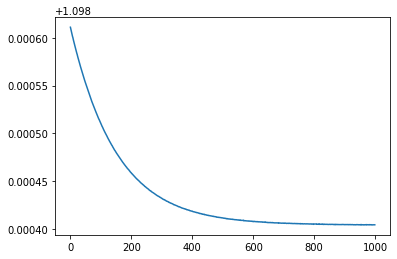

In [220]:
logistic_regression(X, y, learning_rate=0.01, n_iters=1000)

---

Creado por **Raúl Lara Cabrera** (raul.lara@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">